# Problem Definition

I worked in a cellular service provider. My company wants to make continuous reward program for its loyal member. Because it is continuous, my company wants to give the program only for those who are prospective to be a loyal member. The aim is to keep them using our service for a long time.

# EDA Goals

Find the characteristics of a client that is prospective to receive the reward program.

# Data Pre-Processing

## Import Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats 
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('seluler.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

This data contains 7043 rows and 21 columns.

## Column Description

In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
desc = [
    'Unique ID for each customer',
    'Sexual type of customer',
    'Customer who is older than 60 years old',
    '(unknown)',
    '(unknown)',
    'Duration of using service from our company (unkknown units)',
    'Basic cellular service, e.g. SMS and phone calls',
    'Service that permits multiple people to be on the phone at the same time',
    'Internet access service',
    'Protection from malware, phising, and malicious website',
    'Data backup service',
    'Insurance service to cover damage on telecommunication device given by our company',
    'Maintenance service of telecommunication device from our company',
    'Cable TV service',
    'Access to chosen movie provider',
    'Duration of recent contract',
    'Type of billing',
    'Payment methods',
    'Monthly charges',
    'Total charges while being client',
    'Quiting status of a client'
]

In [6]:
data_desc = []
for i in range(len(df.columns)):
    data_desc.append([
        df.columns[i],
        desc[i],
        df[df.columns[i]].dtypes,
        df[df.columns[i]].isnull().sum(),
        round((((df[df.columns[i]].isnull().sum()) / (len(df))) * 100), 2),
        df[df.columns[i]].nunique(),
        df[df.columns[i]].drop_duplicates().sample(2).values
    ])

In [7]:
data_desc = pd.DataFrame(data_desc, columns=[
    'Data Features',
    'Description',
    'Data Types',
    'Null',
    'Null Percentage',
    'Unique',
    'Unique Sample'
])
data_desc

,Data Features,Description,Data Types,Null,Null Percentage,Unique,Unique Sample
0,customerID,Unique ID for each customer,object,0,0.0,7043,"[3181-VTHOE, 9462-MJUAW]"
1,gender,Sexual type of customer,object,0,0.0,2,"[Female, Male]"
2,SeniorCitizen,Customer who is older than 60 years old,int64,0,0.0,2,"[0, 1]"
3,Partner,(unknown),object,0,0.0,2,"[No, Yes]"
4,Dependents,(unknown),object,0,0.0,2,"[Yes, No]"
5,tenure,Duration of using service from our company (un...,int64,0,0.0,73,"[23, 69]"
6,PhoneService,"Basic cellular service, e.g. SMS and phone calls",object,0,0.0,2,"[Yes, No]"
7,MultipleLines,Service that permits multiple people to be on ...,object,0,0.0,3,"[Yes, No]"
8,InternetService,Internet access service,object,0,0.0,3,"[No, DSL]"
9,OnlineSecurity,"Protection from malware, phising, and maliciou...",object,0,0.0,3,"[No internet service, No]"


## Detecting Missing Values

In [8]:
print(df[df == ' '].count())

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


/home/momo/miniconda3/envs/sian/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/momo/miniconda3/envs/sian/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


## Handling Missing Values in Column 'TotalCharges'

In [9]:
df[df.TotalCharges == ' '].head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No


In [10]:
df[df.tenure == 0].head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No


In [11]:
print(f"Number of data with missing total charges: {len(df[df.TotalCharges == ' '])}")
print(f"Number of data with 0 tenure: {len(df[df.tenure == 0])}")

Number of data with missing total charges: 11
Number of data with 0 tenure: 11


In [12]:
df[df.TotalCharges == ' '] = df[df.TotalCharges == ' '].replace(' ', 0)

In [13]:
df[df.TotalCharges == np.nan]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


All missing values in column 'TotalCharges' has been replaced with 0.

## Converting Data Type of Column 'SeniorCitizen' (int64 -> string)

In [14]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype('string')

In [15]:
df[df.SeniorCitizen == '0'] = df[df.SeniorCitizen == '0'].replace('0', 'No')
df[df.SeniorCitizen == '1'] = df[df.SeniorCitizen == '1'].replace('1', 'Yes')

## Converting Data Type of Column 'TotalCharges' (object -> float)

In [16]:
df['TotalCharges'] = df['TotalCharges'].astype('float64')

## Reconstruct Column Description

In [17]:
data_desc = []
for i in range(len(df.columns)):
    data_desc.append([
        df.columns[i],
        desc[i],
        df[df.columns[i]].dtypes,
        df[df.columns[i]].isnull().sum(),
        round((((df[df.columns[i]].isnull().sum()) / (len(df))) * 100), 2),
        df[df.columns[i]].nunique(),
        df[df.columns[i]].drop_duplicates().sample(2).values
    ])

In [18]:
data_desc = pd.DataFrame(data_desc, columns=[
    'Data Features',
    'Description',
    'Data Types',
    'Null',
    'Null Percentage',
    'Unique',
    'Unique Sample'
])
data_desc

,Data Features,Description,Data Types,Null,Null Percentage,Unique,Unique Sample
0,customerID,Unique ID for each customer,object,0,0.0,7043,"[5684-FJVYR, 5995-WWKKG]"
1,gender,Sexual type of customer,object,0,0.0,2,"[Female, Male]"
2,SeniorCitizen,Customer who is older than 60 years old,string,0,0.0,2,"[Yes, No]"
3,Partner,(unknown),object,0,0.0,2,"[Yes, No]"
4,Dependents,(unknown),object,0,0.0,2,"[No, Yes]"
5,tenure,Duration of using service from our company (un...,int64,0,0.0,73,"[17, 0]"
6,PhoneService,"Basic cellular service, e.g. SMS and phone calls",object,0,0.0,2,"[No, Yes]"
7,MultipleLines,Service that permits multiple people to be on ...,object,0,0.0,3,"[No phone service, No]"
8,InternetService,Internet access service,object,0,0.0,3,"[Fiber optic, DSL]"
9,OnlineSecurity,"Protection from malware, phising, and maliciou...",object,0,0.0,3,"[No, No internet service]"


## Numerical Data Description

In [19]:
num_desc = df.describe().T
num_desc

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
TotalCharges,7043.0,2279.734304,2266.794470,0.00,398.55,1394.55,3786.60,8684.80


### Finding Outliers: Box Plot

/home/momo/miniconda3/envs/sian/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/momo/miniconda3/envs/sian/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/momo/miniconda3/envs/sian/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretatio

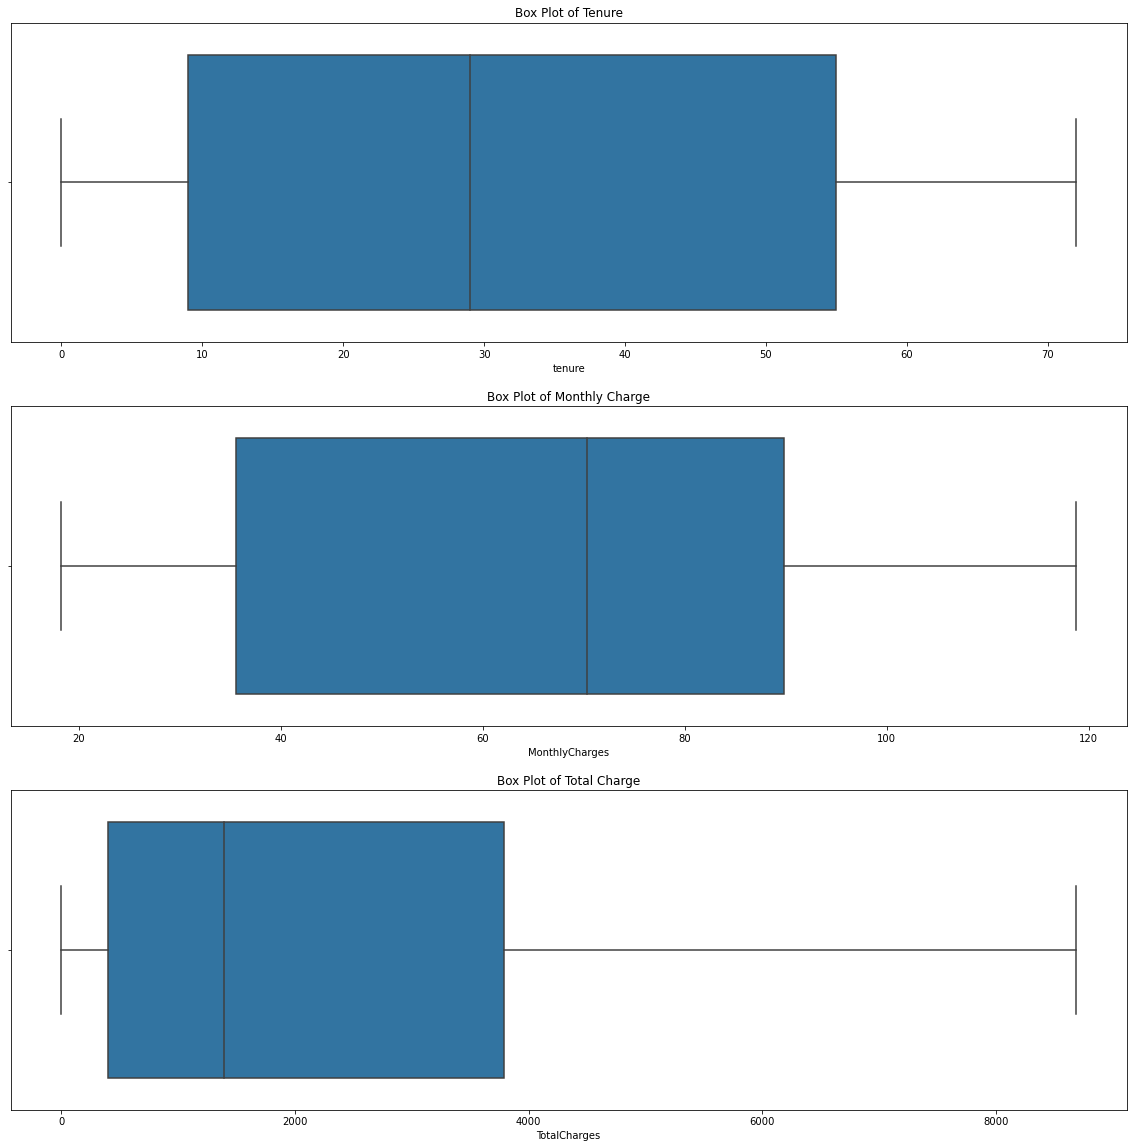

In [20]:
plt.figure(figsize = (20,20))

plt.subplot(3,1,1)
sns.boxplot(df.tenure)
plt.title('Box Plot of Tenure')

plt.subplot(3,1,2)
sns.boxplot(df.MonthlyCharges)
plt.title('Box Plot of Monthly Charge')

plt.subplot(3,1,3)
sns.boxplot(df.TotalCharges)
plt.title('Box Plot of Total Charge')

plt.show()

### Finding Outliers: Mistyped Values

In [21]:
df[(df.MonthlyCharges > df.TotalCharges) & (df.tenure > 0)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


### Finding Outliers: Tatistical Formula

#### Tenure

In [22]:
Q1 = num_desc['25%']['tenure']
Q3 = num_desc['75%']['tenure']
IQR = Q3 - Q1
upper_tc = Q3 + (1.5 * IQR)
lower_tc = Q1 - (1.5 * IQR)

In [23]:
df[(df.tenure > upper_tc)|(df.tenure)<lower_tc]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


#### Monthly Charges

In [24]:
Q1 = num_desc['25%']['MonthlyCharges']
Q3 = num_desc['75%']['MonthlyCharges']
IQR = Q3 - Q1
upper_tc = Q3 + (1.5 * IQR)
lower_tc = Q1 - (1.5 * IQR)

In [25]:
df[(df.MonthlyCharges > upper_tc)|(df.MonthlyCharges)<lower_tc]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


#### Total Charges

In [26]:
Q1 = num_desc['25%']['TotalCharges']
Q3 = num_desc['75%']['TotalCharges']
IQR = Q3 - Q1
upper_tc = Q3 + (1.5 * IQR)
lower_tc = Q1 - (1.5 * IQR)

In [27]:
df[(df.TotalCharges > upper_tc)|(df.TotalCharges)<lower_tc]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


Even if there is outliers in these columns (where the value is more than mean+(3*stdev)), they are not supposed to be dropped because tenure, monthly charge, and total charge is continuous data. It is possible to be positive infinity. But, if the outliers drop below 0, we need to remove the data, because those columns is impossible to have negative values.

# Univariate Data Analysis

## Categorical Data Analysis

In [28]:
df.describe(include=[object]).T

,count,unique,top,freq
customerID,7043,7043,5309-TAIKL,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


## Numerical Data Analysis

### Tenure

/home/momo/miniconda3/envs/sian/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


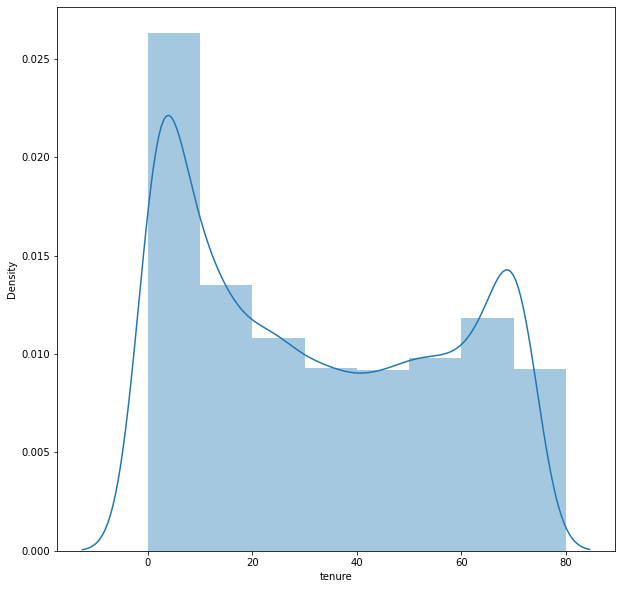

In [29]:
bins = [0,10,20,30,40,50,60,70,80]
plt.figure(figsize = (10,10))
sns.distplot(df.tenure, bins = bins)
plt.show()

### Monthly Charge

/home/momo/miniconda3/envs/sian/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


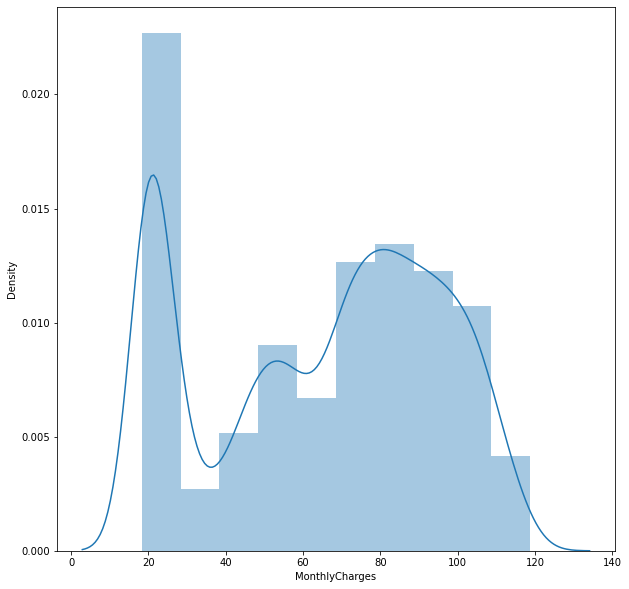

In [30]:
# Histogram of Monthly Charge
plt.figure(figsize = (10,10))
sns.distplot(df.MonthlyCharges, bins = 10)
plt.show()

### Total Charge

/home/momo/miniconda3/envs/sian/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


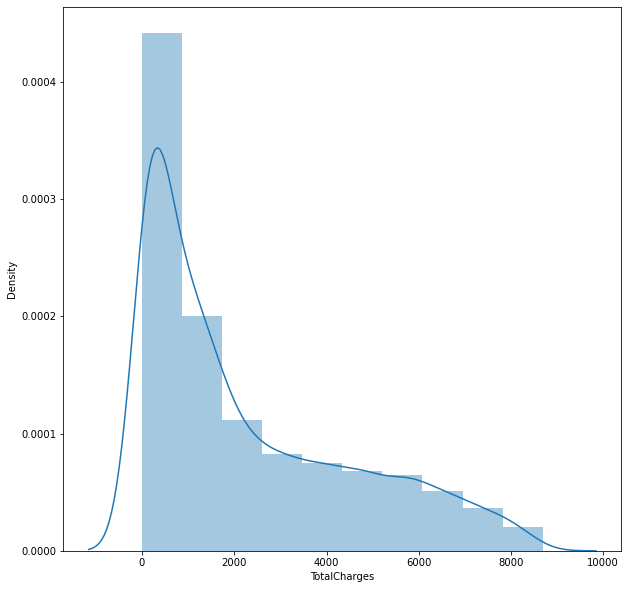

In [31]:
plt.figure(figsize = (10,10))
sns.distplot(df.TotalCharges, bins = 10)
plt.show()

# Multivariate Data Analysis

## Correlation between Numerical Columns

<AxesSubplot:>

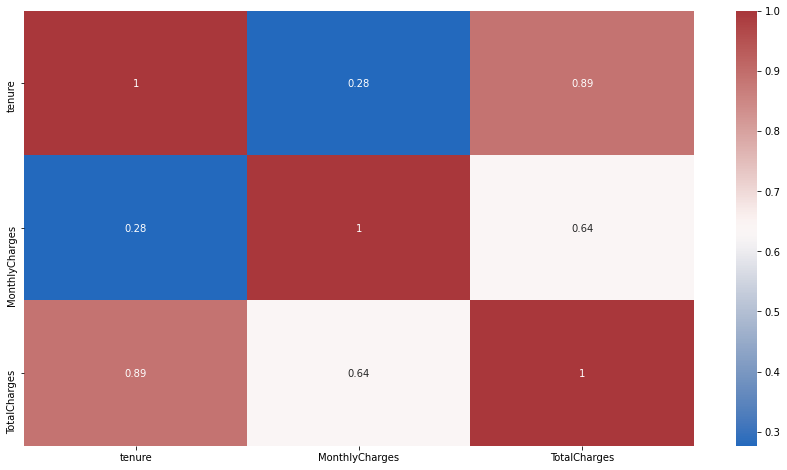

In [32]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr('spearman'), annot = True, cmap='vlag') #using spearman because the data is not normally distributed

## Gender and Churn

In [33]:
gen_churn = pd.crosstab(index = df.gender, columns = df.Churn)
gen_churn['Total'] = gen_churn['Yes']+gen_churn['No']
gen_churn['Churn_Percentage'] = (gen_churn['Yes'])/(gen_churn['Total'])*100
gen_churn

Churn,No,Yes,Total,Churn_Percentage
gender,,,,
Female,2549,939,3488,26.920872
Male,2625,930,3555,26.160338


## Tenure and Churn

In [34]:
bins = [0,10,20,30,40,50,60,70,80]
groups = df.groupby(['Churn', pd.cut(df.tenure, bins)])
groups = groups.size().unstack().T
groups['Total'] = groups['Yes']+groups['No']
groups['Churn_Percentage'] = (groups['Yes'])/(groups['Total'])*100
groups

Churn,No,Yes,Total,Churn_Percentage
tenure,,,,
"(0, 10]",991,968,1959,49.412966
"(10, 20]",625,283,908,31.167401
"(20, 30]",589,174,763,22.804718
"(30, 40]",504,141,645,21.860465
"(40, 50]",537,115,652,17.638037
"(50, 60]",603,95,698,13.610315
"(60, 70]",794,81,875,9.257143
"(70, 80]",520,12,532,2.255639


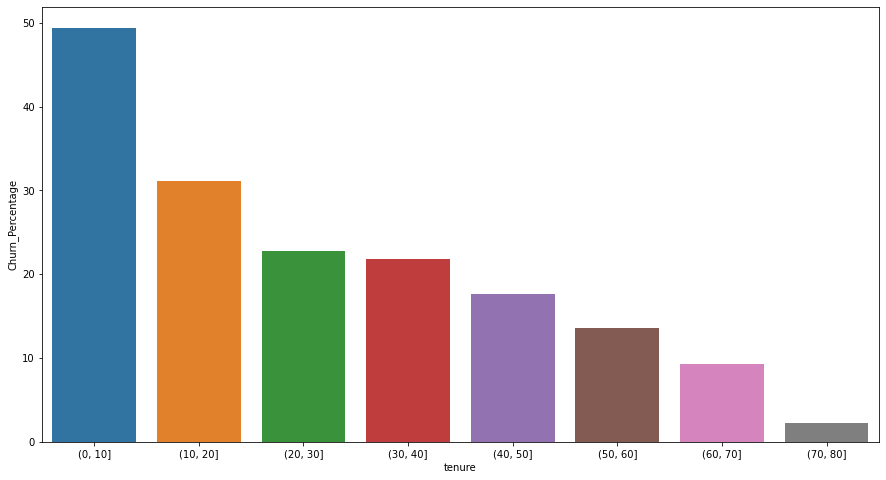

In [35]:
plt.figure(figsize = (15, 8))
sns.barplot(x = groups.index, y = groups.Churn_Percentage)
plt.show()

## Phone Service and Churn

In [36]:
ps_churn = pd.crosstab(index = df.PhoneService, columns = df.Churn)
ps_churn['Total'] = ps_churn['Yes']+ps_churn['No']
ps_churn['Churn_Percentage'] = (ps_churn['Yes'])/(ps_churn['Total'])*100
ps_churn

Churn,No,Yes,Total,Churn_Percentage
PhoneService,,,,
No,512,170,682,24.926686
Yes,4662,1699,6361,26.709637


## Internet Service and Churn

In [37]:
is_churn = pd.crosstab(index = df.InternetService, columns = df.Churn)
is_churn['Total'] = is_churn['Yes']+is_churn['No']
is_churn['Churn_Percentage'] = (is_churn['Yes'])/(is_churn['Total'])*100
is_churn

Churn,No,Yes,Total,Churn_Percentage
InternetService,,,,
DSL,1962,459,2421,18.959108
Fiber optic,1799,1297,3096,41.892765
No,1413,113,1526,7.404980


## Internet Service, Monthly Charges, and Churn

In [38]:
is_mc = pd.crosstab(index=df.InternetService, columns=df.Churn, values=df.MonthlyCharges, aggfunc='mean')
is_mc

Churn,No,Yes
InternetService,,
DSL,60.212105,49.083224
Fiber optic,93.932379,88.126484
No,21.136058,20.368142


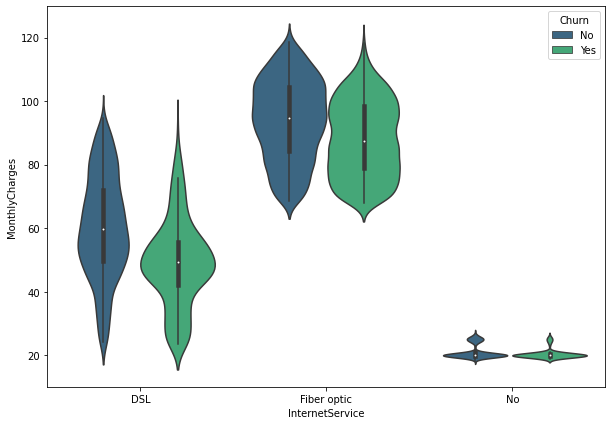

In [39]:
plt.figure(figsize=(10,7))
sns.violinplot(x = df.InternetService, y = df.MonthlyCharges, palette = 'viridis', hue = df.Churn )
plt.show()

## Internet Service, Tech Support and Churn

In [40]:
ists_churn = pd.crosstab(index = [df.InternetService, df.TechSupport], columns = df.Churn)
ists_churn['Total'] = ists_churn['Yes']+ists_churn['No']
ists_churn['Churn_Percentage'] = (ists_churn['Yes'])/(ists_churn['Total'])*100
ists_churn

Churn                                  No   Yes  Total  Churn_Percentage
InternetService TechSupport                                             
DSL             No                    898   345   1243         27.755430
                Yes                  1064   114   1178          9.677419
Fiber optic     No                   1129  1101   2230         49.372197
                Yes                   670   196    866         22.632794
No              No internet service  1413   113   1526          7.404980

## Tech Support and Churn

In [41]:
ts_churn = pd.crosstab(index = df.TechSupport, columns = df.Churn)
ts_churn['Total'] = ts_churn['Yes']+ts_churn['No']
ts_churn['Churn_Percentage'] = (ts_churn['Yes'])/(ts_churn['Total'])*100
ts_churn

Churn,No,Yes,Total,Churn_Percentage
TechSupport,,,,
No,2027,1446,3473,41.635474
No internet service,1413,113,1526,7.404980
Yes,1734,310,2044,15.166341


## Streaming TV and Churn

In [42]:
stv_churn = pd.crosstab(index = df.StreamingTV, columns = df.Churn)
stv_churn['Total'] = stv_churn['Yes']+stv_churn['No']
stv_churn['Churn_Percentage'] = (stv_churn['Yes'])/(stv_churn['Total'])*100
stv_churn

Churn,No,Yes,Total,Churn_Percentage
StreamingTV,,,,
No,1868,942,2810,33.523132
No internet service,1413,113,1526,7.404980
Yes,1893,814,2707,30.070188


## Streaming Movies and Churn

In [43]:
sm_churn = pd.crosstab(index = df.StreamingMovies, columns = df.Churn)
sm_churn['Total'] = sm_churn['Yes']+sm_churn['No']
sm_churn['Churn_Percentage'] = (sm_churn['Yes'])/(sm_churn['Total'])*100
sm_churn

Churn,No,Yes,Total,Churn_Percentage
StreamingMovies,,,,
No,1847,938,2785,33.680431
No internet service,1413,113,1526,7.404980
Yes,1914,818,2732,29.941435


## Contract and Churn

In [44]:
c_churn = pd.crosstab(index = df.Contract, columns = df.Churn)
c_churn['Total'] = c_churn['Yes']+c_churn['No']
c_churn['Churn_Percentage'] = (c_churn['Yes'])/(c_churn['Total'])*100
c_churn

Churn,No,Yes,Total,Churn_Percentage
Contract,,,,
Month-to-month,2220,1655,3875,42.709677
One year,1307,166,1473,11.269518
Two year,1647,48,1695,2.831858


## Monthly Charge and Churn

In [45]:
bins = np.arange(0,121,15)
groups = df.groupby(['Churn', pd.cut(df.MonthlyCharges, bins)])
groups = groups.size().unstack().T
groups['Total'] = groups['Yes']+groups['No']
groups['Churn_Percentage'] = (groups['Yes'])/(groups['Total'])*100
groups

Churn,No,Yes,Total,Churn_Percentage
MonthlyCharges,,,,
"(0, 15]",0,0,0,NaN
"(15, 30]",1491,162,1653,9.800363
"(30, 45]",272,105,377,27.851459
"(45, 60]",665,223,888,25.112613
"(60, 75]",707,298,1005,29.651741
"(75, 90]",870,511,1381,37.002172
"(90, 105]",759,462,1221,37.837838
"(105, 120]",410,108,518,20.849421


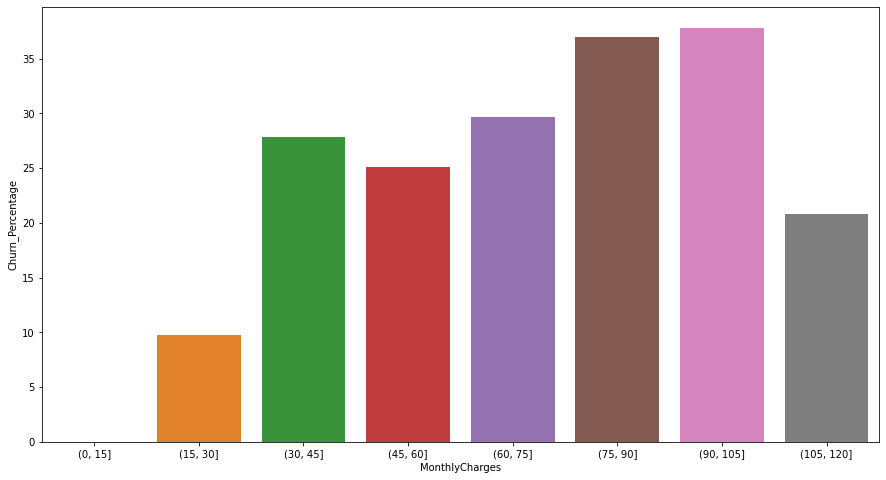

In [46]:
plt.figure(figsize = (15, 8))
sns.barplot(x = groups.index, y = groups.Churn_Percentage)
plt.show()

## Total Charge and Churn

In [47]:
bins = np.arange(0,9000,800)
groups = df.groupby(['Churn', pd.cut(df.TotalCharges, bins)])
groups = groups.size().unstack().T
groups['Total'] = groups['Yes']+groups['No']
groups['Churn_Percentage'] = (groups['Yes'])/(groups['Total'])*100
groups

Churn,No,Yes,Total,Churn_Percentage
TotalCharges,,,,
"(0, 800]",1580,977,2557,38.208838
"(800, 1600]",923,291,1214,23.970346
"(1600, 2400]",538,150,688,21.802326
"(2400, 3200]",364,136,500,27.200000
"(3200, 4000]",353,72,425,16.941176
"(4000, 4800]",325,70,395,17.721519
"(4800, 5600]",310,59,369,15.989160
"(5600, 6400]",302,49,351,13.960114
"(6400, 7200]",225,38,263,14.448669


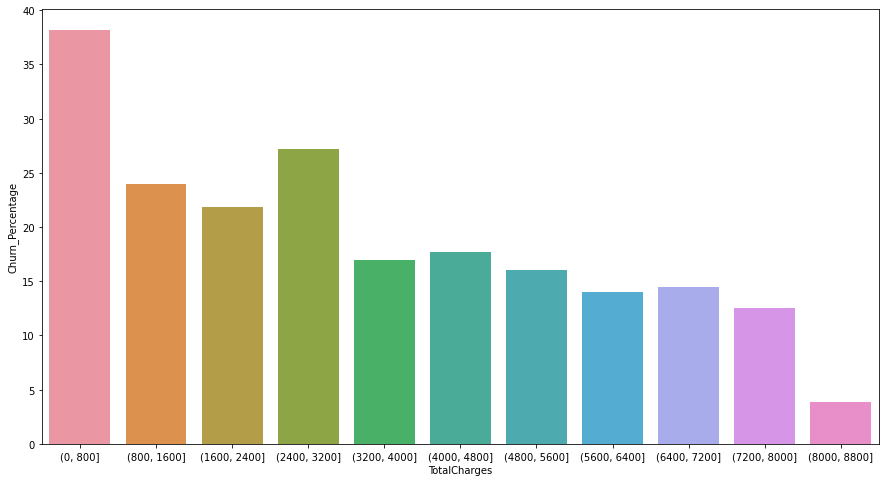

In [48]:
plt.figure(figsize = (15, 8))
sns.barplot(x = groups.index, y = groups.Churn_Percentage)
plt.show()

# Conclusion

# Recommendations